## Feature Engineering

In the following cells, we will engineer the variables of the House Price Dataset so that we tackle:

1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
5. Put the variables in a similar scale

In [2]:
# data wrangling
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt

# yeo-johnson transformation
import scipy.stats as stats


# to divide data into test and train data
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler


# to save the trained scaler class
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('train.csv')

print(data.shape)

data.head(1)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size = 0.1,
    random_state=0
)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

### Target

In [5]:
y_train = np.log(y_train)
y_test = np.log(y_test)

## Missing Values

### Categorical variables

Variables with lots of missing values will be replaced with "missing". Variables with fewer missing values ibservation with the most frequent

In [6]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

cat_vars = cat_vars + ['MSSubClass']


X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')


len(cat_vars)

44

In [7]:
cat_vars_with_na = [
    var for var in cat_vars
    if X_train[var].isnull().sum() > 0
]


X_train[cat_vars_with_na].isnull().mean().sort_values(
    ascending=False
)

PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
BsmtExposure    0.025114
BsmtFinType2    0.025114
BsmtQual        0.024353
BsmtCond        0.024353
BsmtFinType1    0.024353
MasVnrType      0.004566
Electrical      0.000761
dtype: float64

In [8]:
# for columns with missing value greater than 10%
# replace with 'missing'
# While for those less than 10% replace with the first mode


with_string_missing = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean()
    > 0.1 
]


with_mode_missing = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean()
    < 0.1
]

In [9]:
with_string_missing

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [10]:
X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing] = X_test[with_string_missing].fillna('Missing')

In [11]:
with_mode_missing

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [12]:
missing_mode = X_train[with_mode_missing].mode()

In [13]:
missing_mode

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,None,TA,TA,No,Unf,Unf,SBrkr,Attchd,Unf,TA,TA


In [14]:
for var in with_mode_missing:

    mode = X_train[var].mode()[0]

    print('{0} mode is ==> {1}'.format(var, mode))

    X_train[var].fillna(mode, inplace=True)
    X_test[var].fillna(mode, inplace=True)



MasVnrType mode is ==> None
BsmtQual mode is ==> TA
BsmtCond mode is ==> TA
BsmtExposure mode is ==> No
BsmtFinType1 mode is ==> Unf
BsmtFinType2 mode is ==> Unf
Electrical mode is ==> SBrkr
GarageType mode is ==> Attchd
GarageFinish mode is ==> Unf
GarageQual mode is ==> TA
GarageCond mode is ==> TA


In [15]:
# comfirm there are no more missing values

X_train[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

### Numerical variables

To engineer missing values for numerical variables, we will:


1. Add a binary indicator variable column
2. Replace the missing values in the original variable with mean

In [16]:
num_vars = [
    var for var in X_train.columns if var not in cat_vars and var != 'SalePrice'
]

# number of numerical variables
len(num_vars)


35

In [17]:
# list of numerical variables with missing values

vars_with_na = [
    var for var in num_vars if X_train[var].isnull().sum() > 0
]


X_train[vars_with_na].isnull().mean()



LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

In [18]:
# replace missing values with mean
# create binary indicator columns

for var in vars_with_na:

    mean = X_train[var].mean()

    print(var, mean)

    X_train[var + '_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var + '_na'] = np.where(X_test[var].isnull(), 1, 0)


    X_train[var].fillna(mean, inplace=True)
    X_test[var].fillna(mean, inplace=True)

X_train[vars_with_na].isnull().sum()
    

LotFrontage 69.87974098057354
MasVnrArea 103.7974006116208
GarageYrBlt 1978.2959677419356


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [19]:
# double check there are no non values in the test data
X_test[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [20]:
[var for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

In [21]:
# Have a look at the binary indicator column

X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head(3)

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,0,0,0
656,0,0,0
45,0,0,0


### Temporal (year) Variable

In [22]:
def elapsed_years(df, var):

    df[var] = df['YrSold'] - df[var]
    return df

In [23]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:

    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [24]:
X_train.drop(['YrSold'], axis = 1, inplace=True)
X_test.drop(['YrSold'], axis = 1, inplace=True)

### Logarithmic Transformation

We will transform with the logarightm the positive numerical variables in order to get a more Gaussian-like distribution.

In [25]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])  

In [26]:
# confirm that there are no null values in the extracted tweets

[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_test[var].isnull().sum() > 0]

[]

In [27]:
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_train[var].isnull().sum() > 0]

[]

### Yeo-transformation

In [28]:
X_train['LotArea'], param = stats.yeojohnson(X_train['LotArea'])

X_test['LotArea'] = stats.yeojohnson(X_test['LotArea'], lmbda=param)


print(param)

-12.55283001172003


/home/arnold/Desktop/MlOp/env/lib/python3.8/site-packages/scipy/stats/morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
/home/arnold/Desktop/MlOp/env/lib/python3.8/site-packages/scipy/optimize/optimize.py:2621: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/home/arnold/Desktop/MlOp/env/lib/python3.8/site-packages/scipy/optimize/optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/home/arnold/Desktop/MlOp/env/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [29]:
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [30]:
[var for var in X_train.columns if X_test[var].isnull().sum() > 0]

[]

### Binarised Skewed Variables

from the data analysis, there were 6 skewed variables. We are going to binarised these variables

In [31]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]


for var in skewed:

    X_train[var] = np.where(X_train[var] == 0, 0, 1)
    X_test[var] = np.where(X_test[var] == 0, 0, 1)

### Categorical Variables

### Apply mapping 

From kaggle website there are some these variables that have assigned values have an assigned order.

In [32]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]
            
for var in qual_vars:
    X_train[var] = X_train[var].map(qual_mappings)
    X_test[var] = X_test[var].map(qual_mappings)

In [33]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'


X_train[var] = X_train[var].map(exposure_mappings)
X_test[var] = X_test[var].map(exposure_mappings)


In [34]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']



for var in finish_vars:
    X_train[var] = X_train[var].map(finish_mappings)
    X_test[var] = X_test[var].map(finish_mappings)

In [35]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'


X_train[var] = X_train[var].map(garage_mappings)
X_test[var] = X_test[var].map(garage_mappings)

In [36]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_mappings)
X_test[var] = X_test[var].map(fence_mappings)

In [37]:
# confirm there are no null values in the train data
[
    var for var in X_train.columns if X_train[var].isnull().sum() > 0
]

[]

In [38]:
# confirm there are no null values in the test data

[
    var for var in X_test.columns if X_test[var].isnull().sum() > 0
]

[]

### Taking care of rare label

In [39]:
qual_vars = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)


30

In [40]:
# grouo data by the variable

tmp = data.groupby('MSZoning')['MSZoning'].count() / len(data)

In [41]:
tmp

MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
RL         0.788356
RM         0.149315
Name: MSZoning, dtype: float64

In [42]:
data.groupby('MSZoning')['MSZoning'].count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: MSZoning, dtype: int64

In [43]:
tmp[tmp > 0.01].index

Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

In [44]:
def find_frequent_label(df, var, rare_perc):

    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_others:

    frequent_ls = find_frequent_label(X_train, var, 0.01)

    print(var, frequent_ls)
    print()


    # replace rare categories with the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls
    ), X_train[var], 'Rare')

    X_test[var] = np.where(X_test[var].isin(
        frequent_ls
    ), X_test[var], 'Rare')



MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

Alley Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')

Con

### Encoding of categorical variables

We will transform the strings in the categorical variables into numbers starting with the highest

In [45]:
cat_others_12 = cat_others[:12]

cat_others_12

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType']

In [46]:
ordered_labels = data.groupby(['Neighborhood', 'LandSlope', 'LotShape'])['SalePrice'].mean().sort_values()

ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

ordered_labels

Neighborhood  LandSlope  LotShape
BrkSide       Mod        Reg          39300.0
Edwards       Sev        IR1          61000.0
OldTown       Gtl        IR3          73000.0
              Mod        IR1          73750.0
IDOTRR        Gtl        IR1          87250.0
                                       ...   
Timber        Sev        IR3         375000.0
NridgHt       Gtl        IR2         437154.0
StoneBr       Gtl        IR2         438780.0
OldTown       Gtl        IR2         475000.0
StoneBr       Mod        IR2         538000.0
Name: SalePrice, Length: 104, dtype: float64

In [47]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price

def replace_categories(train, test, y_train, var, target):

    tmp = pd.concat(
        [X_train, y_train], axis = 1
    )

    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    print(var, ordinal_label)
    print()

    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [48]:
for var in cat_others:
    replace_categories(X_train, X_test, y_train, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story'

In [49]:
[var for var in X_train.columns if X_train[var].isnull().sum()]

[]

In [50]:
[var for var in X_test.columns if X_test[var].isnull().sum()]

[]

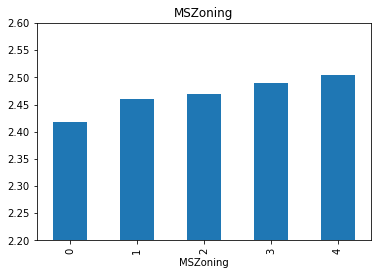

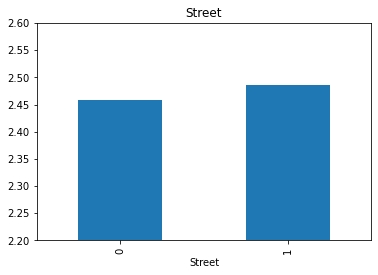

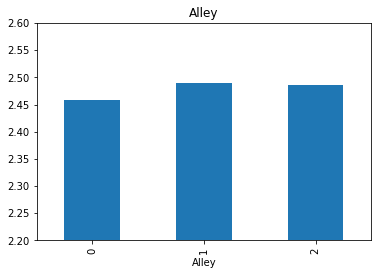

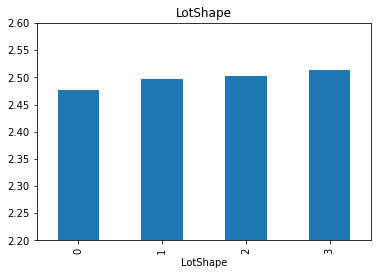

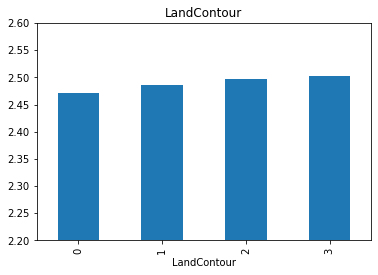

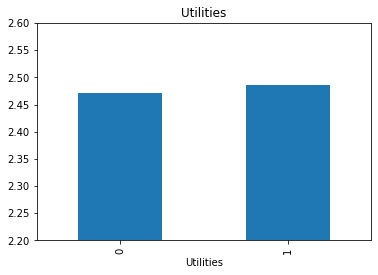

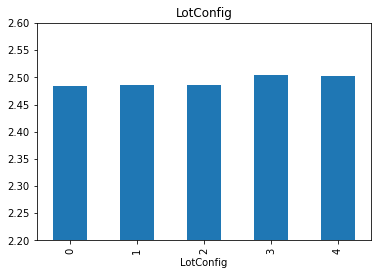

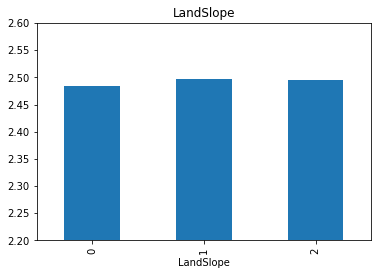

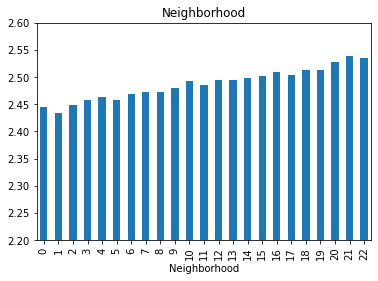

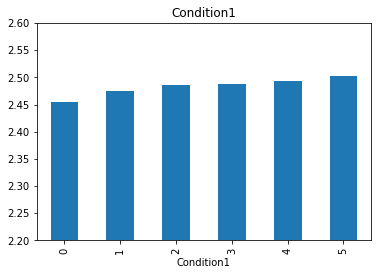

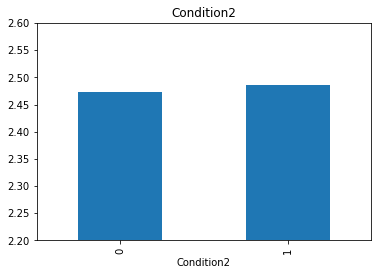

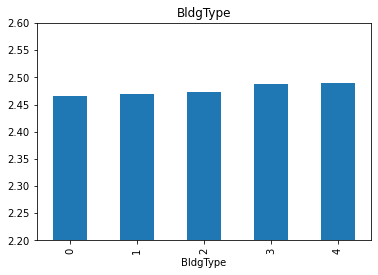

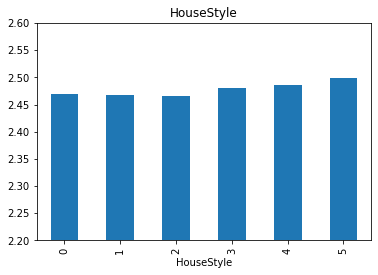

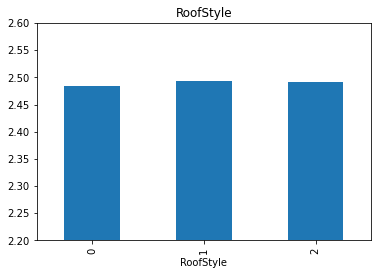

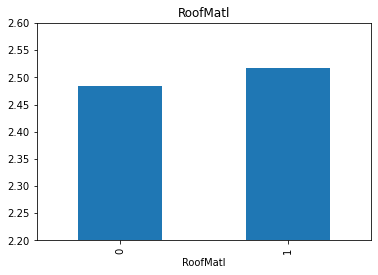

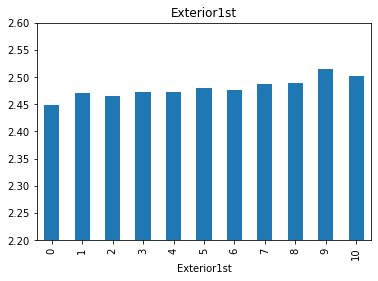

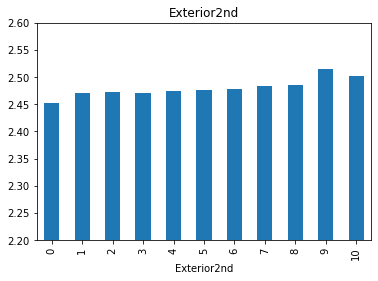

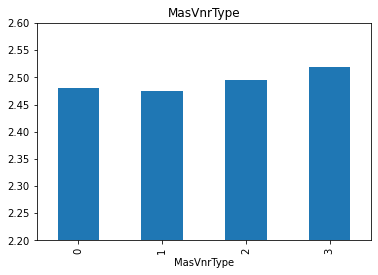

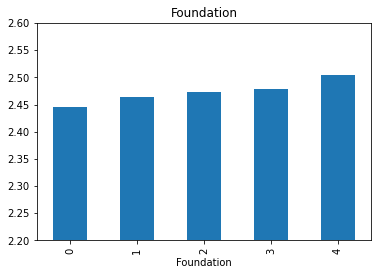

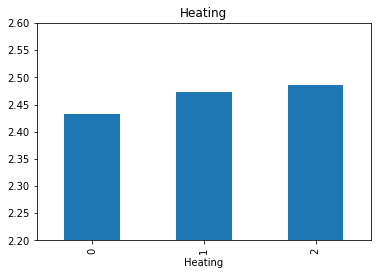

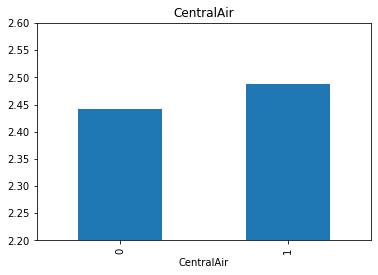

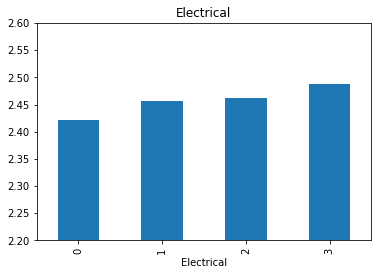

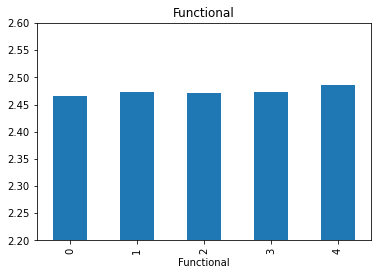

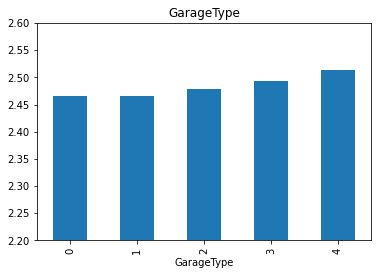

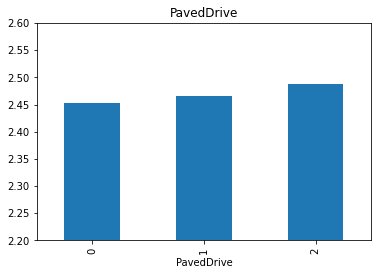

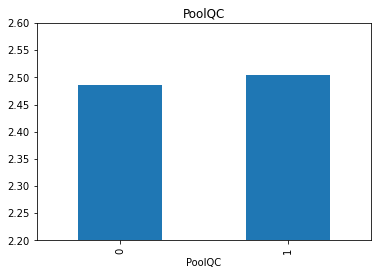

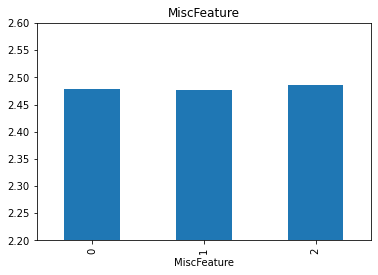

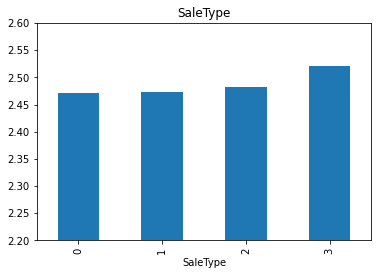

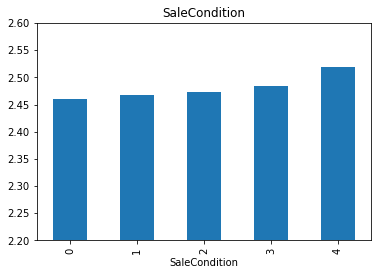

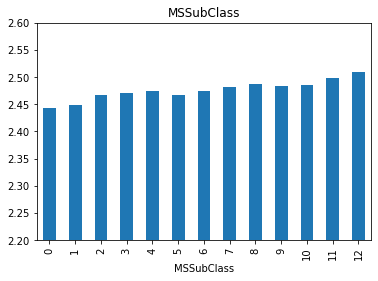

In [51]:
# let explore the monotonic relationship between the target variable 
# and label

def analyse_vars(train, y_train, var):

    tmp = pd.concat([X_train, np.log(y_train)], axis = 1)

    tmp.groupby(var)['SalePrice'].median().plot.bar()

    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.show()


for var in cat_others:
    analyse_vars(X_train, y_train, var)

### Feature Scaling

In [52]:
# create scaler
scaler = MinMaxScaler()

# fit the scaler to the train set
scaler.fit(X_train)


# sklearn returns numpy array, so we wrap the array
# with a pandas dataframe
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)


X_test = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

In [53]:
X_train.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.0,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.0,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.0,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.0,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.0,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.0,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0


In [54]:
# save output for next notebook

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

In [55]:
# let save the scaler

joblib.dump(scaler, 'minmax_scaler.joblib')

['minmax_scaler.joblib']